 Unit 2- Lesson 2- Project 7
 

### Challenge: Feedback Analysis

Pick one of the company data files and build your own classifier. When you're satisfied with its performance (at this point just using the accuracy measure shown in the example), test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [1]:
#import python packages
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data from amazon and label comlumns
data_file = ("amazon_cells_labelled.txt")
amz_snt = pd.read_csv(data_file, delimiter= '\t', header=None)
amz_snt.columns = ['message','sentiment']

In [4]:
#find keywords for sentiment
keywords = [ 'love' , 'great', 'very', 'happy', 'excellent', 'highly' , 'amazing' , 'terrible' , 'awful' , 'never']

for key in keywords:
    amz_snt[str(key)] = amz_snt.message.str.contains(' ' + str(key) + ' ', case=False)

In [7]:
#consider 'allcaps' for sentiment
amz_snt['allcaps'] = amz_snt.message.str.isupper()

In [8]:
#values for 'positive' and 'neative' were predefined set to boolean
amz_snt['positive'] = (amz_snt['sentiment'] == 1)
amz_snt['negative'] = (amz_snt['sentiment'] == 0)


In [9]:
amz_snt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
message      1000 non-null object
sentiment    1000 non-null int64
love         1000 non-null bool
great        1000 non-null bool
very         1000 non-null bool
happy        1000 non-null bool
excellent    1000 non-null bool
highly       1000 non-null bool
amazing      1000 non-null bool
terrible     1000 non-null bool
awful        1000 non-null bool
never        1000 non-null bool
allcaps      1000 non-null bool
positive     1000 non-null bool
negative     1000 non-null bool
dtypes: bool(13), int64(1), object(1)
memory usage: 28.4+ KB


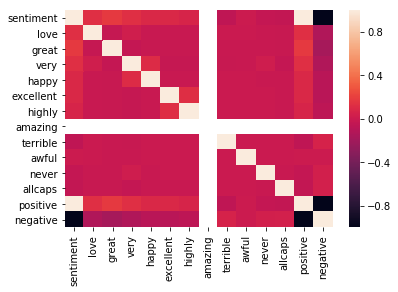

In [10]:
#visualize the data
sns.heatmap(amz_snt.corr())

In [11]:
#define target and data
data_amz = amz_snt[keywords]
target = amz_snt['sentiment']

In [12]:
#accu

from sklearn.naive_bayes import BernoulliNB

# Instantiate  model and store it in a new variable.
bnb = BernoulliNB()

# Fit model to the data.
bnb.fit(data_amz, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_amz)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_amz.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 403


In [13]:
data_file = ("yelp_labelled.txt")
yp_snt = pd.read_csv(data_file, delimiter= '\t', header=None)
yp_snt.columns = ['message','sentiment']

In [15]:
for key in keywords:
   yp_snt[str(key)] = yp_snt.message.str.contains(' ' + str(key) + ' ', case=False)

In [16]:
yp_snt['allcaps'] = yp_snt.message.str.isupper()

In [17]:
yp_snt['positive'] = (yp_snt['sentiment'] == 1)
yp_snt['negative'] = (yp_snt['sentiment'] == 0)

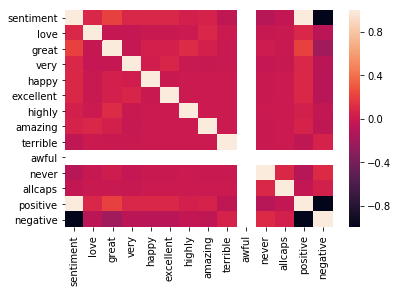

In [19]:
sns.heatmap(yp_snt.corr())

In [21]:
data_yp = yp_snt[keywords]
yp_target = yp_snt['sentiment']

In [22]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate  model and store it in a new variable.
yp_bnb = BernoulliNB()

# Fit model to the data.
yp_bnb.fit(data_yp, yp_target)

# Classify, storing the result in a new variable.
yp_y_pred = yp_bnb.predict(data_yp)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_yp.shape[0],
    (yp_target != yp_y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 419
